# **Probleam statement** <br>
Over the years, the company has
collected details and gathered a lot of
information about individuals
The
management wants to build an intelligent
system from the data to determine the
presence or absence of smoking in a person
through bio-signals. Given a person’s
information, build a machine learning model
that can classify the presence or absence of
smoking.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [ ]:
df = pd.read_csv("/content/smoking.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [ ]:
df.drop(columns='ID',inplace=True)

In [ ]:
df.shape

(55692, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [ ]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [ ]:
cat_cols = df.select_dtypes(include='object')
num_cols = df.select_dtypes(include=['int','float'])

In [ ]:
for i in cat_cols:
  print(f'Columns Name: {i} \n{df[i].value_counts()}\n\n')

Columns Name: gender 
M    35401
F    20291
Name: gender, dtype: int64


Columns Name: oral 
Y    55692
Name: oral, dtype: int64


Columns Name: tartar 
Y    30940
N    24752
Name: tartar, dtype: int64




In [ ]:
df.drop(columns='oral',inplace=True)

In [ ]:
df.isnull().sum().sum()

0

**Data Visualization**

What is the smoker and non-smoker population ?

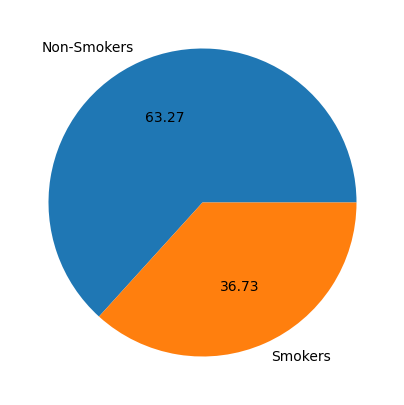

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df.smoking.value_counts(),labels=["Non-Smokers","Smokers"],autopct='%.2f')
plt.show()

Does smoking depend on their age?

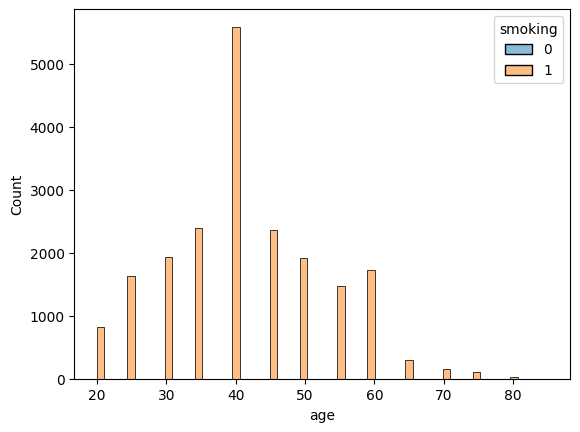

In [ ]:
sns.histplot(x=df[df.smoking == 1].age,hue=df.smoking)
plt.show()

What is the sexual diversity in the data?
And Do men smoke more than women?

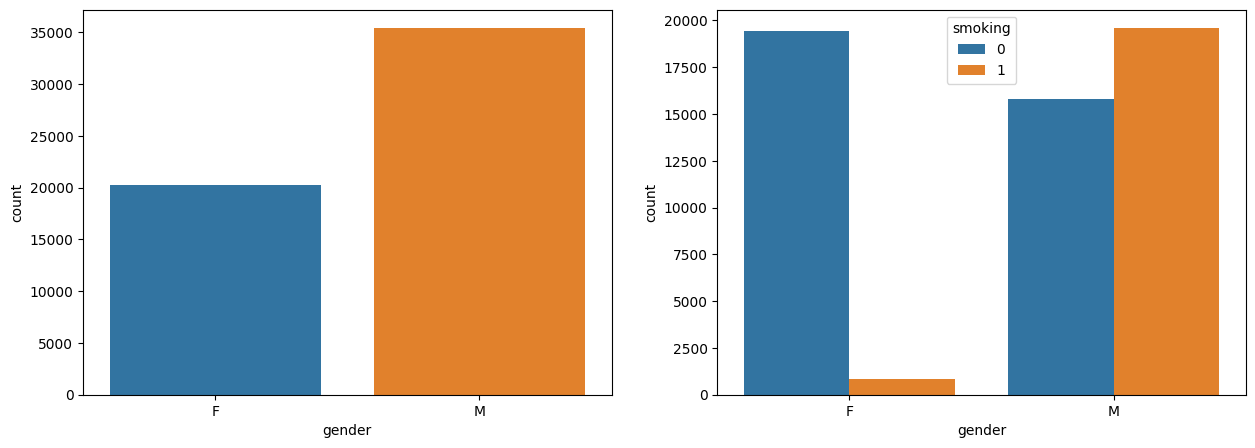

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = df.gender)
plt.subplot(1,2,2)
sns.countplot(x = df.gender,hue=df.smoking)
plt.show()

Are there any outliers in the data ?

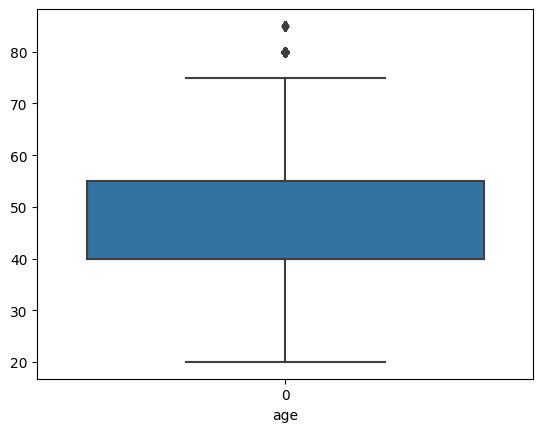

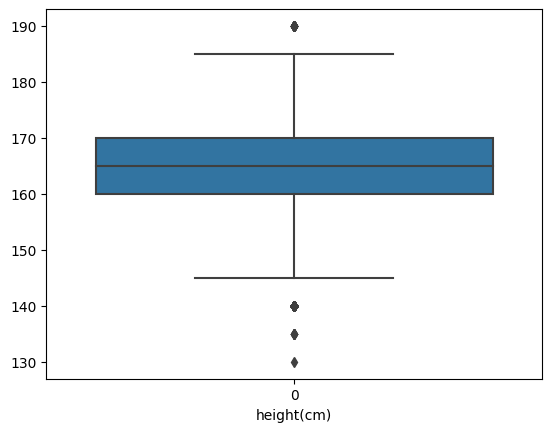

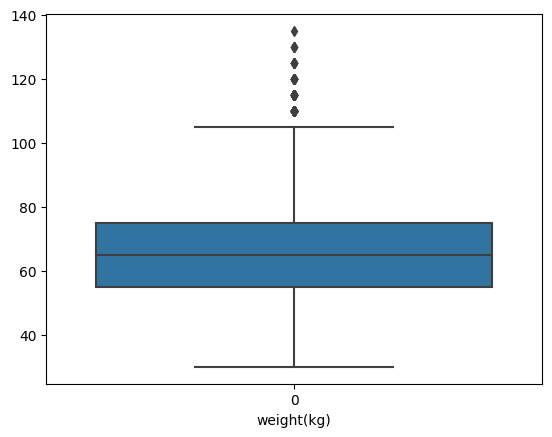

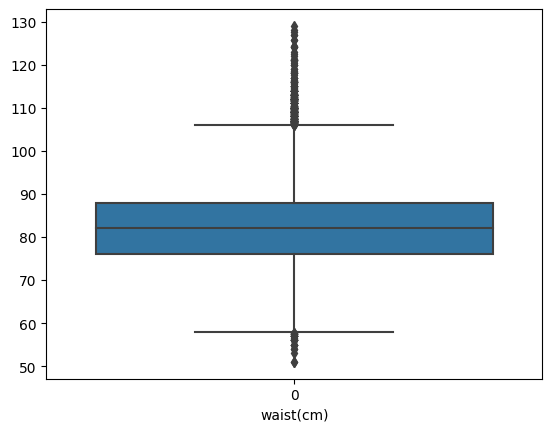

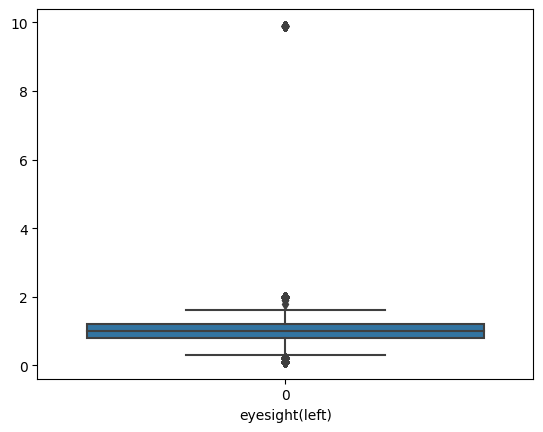

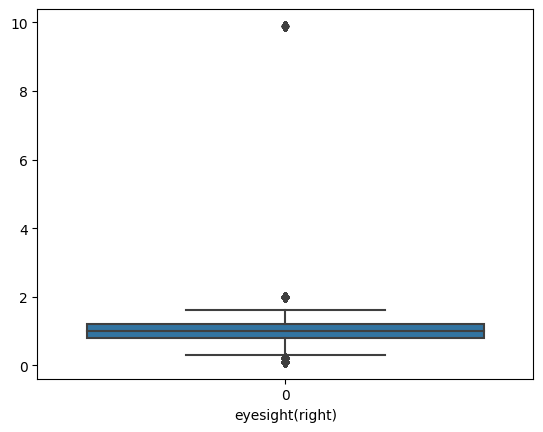

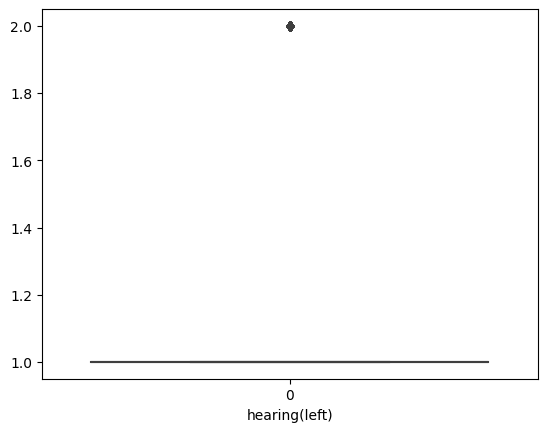

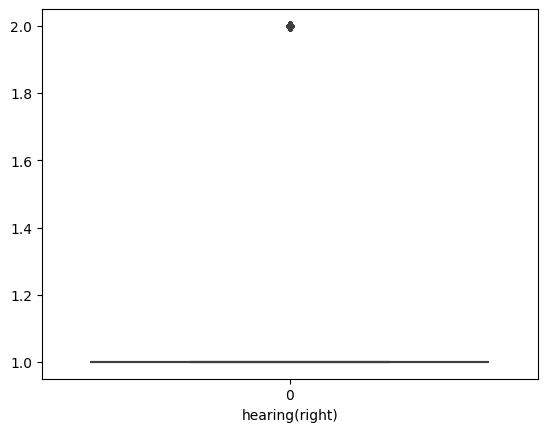

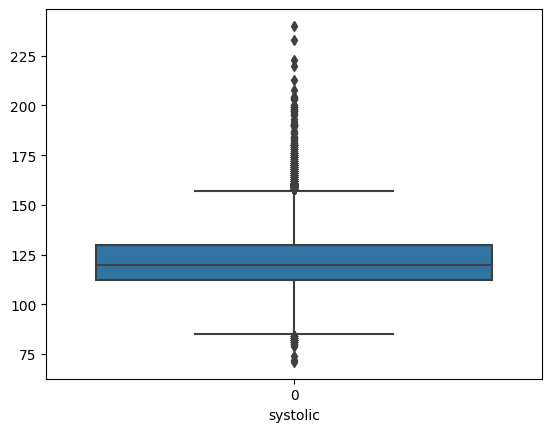

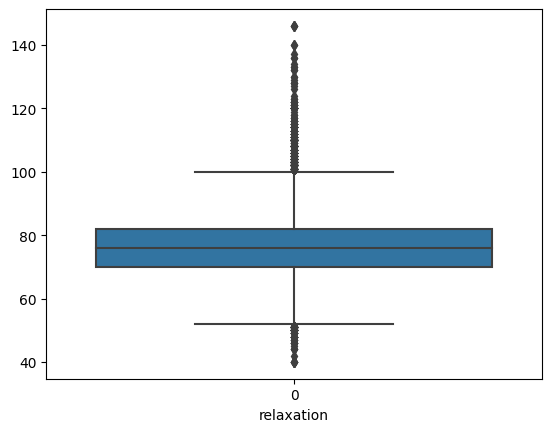

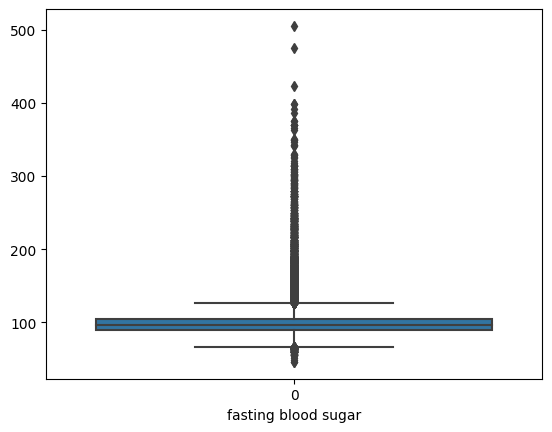

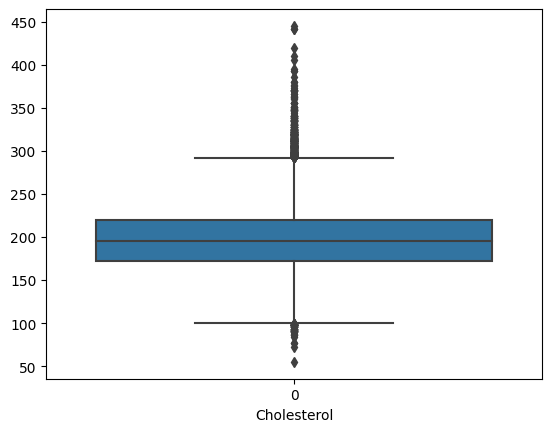

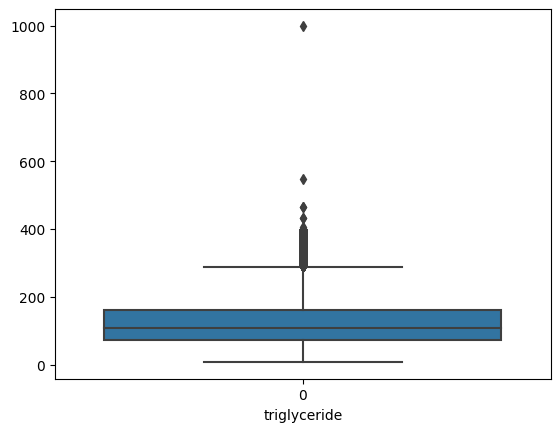

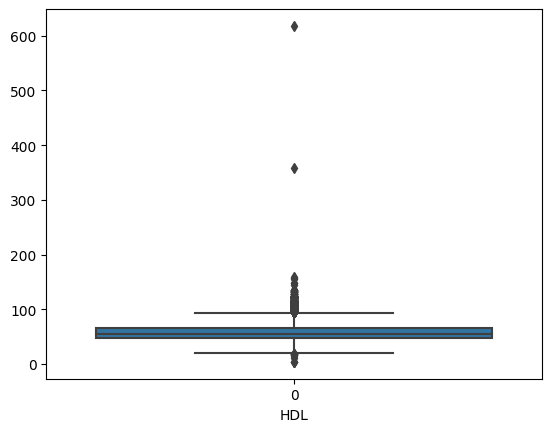

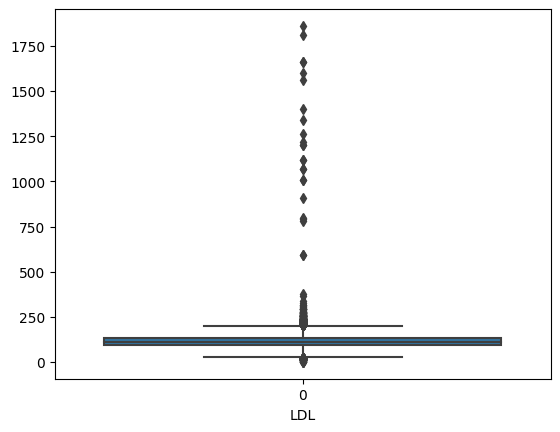

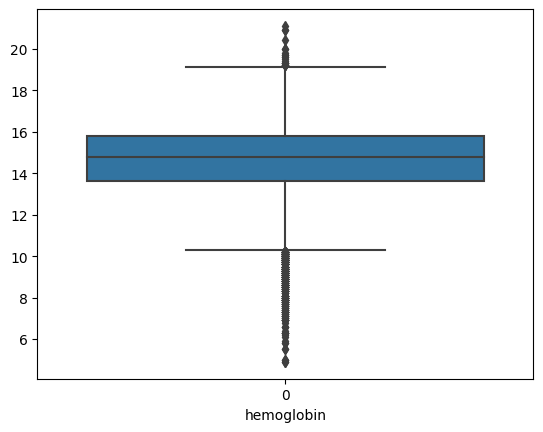

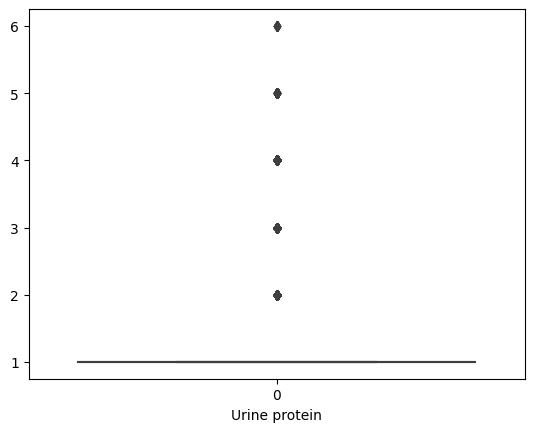

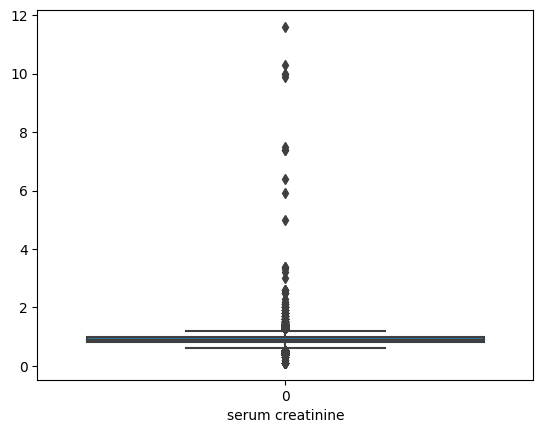

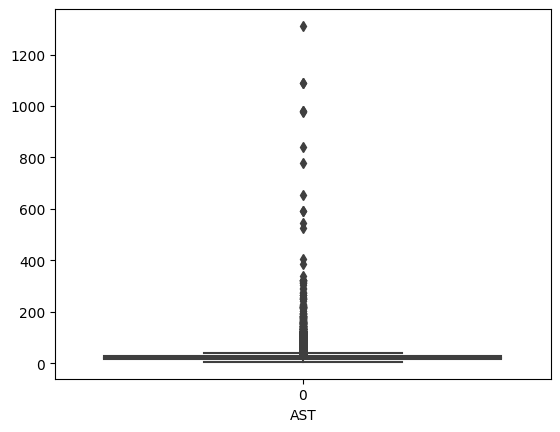

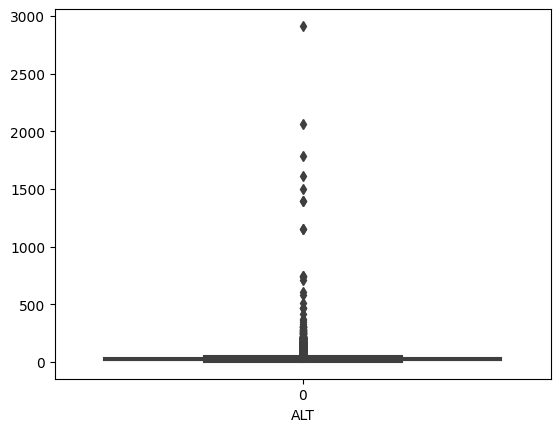

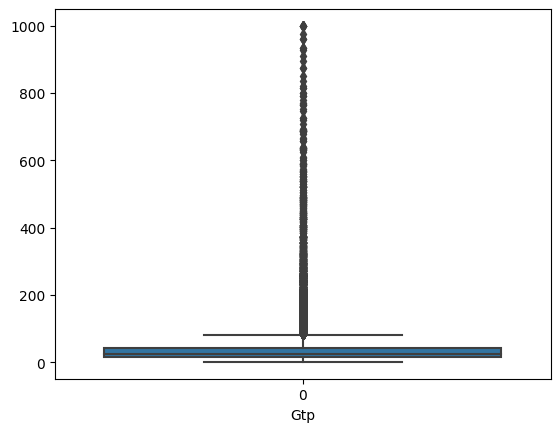

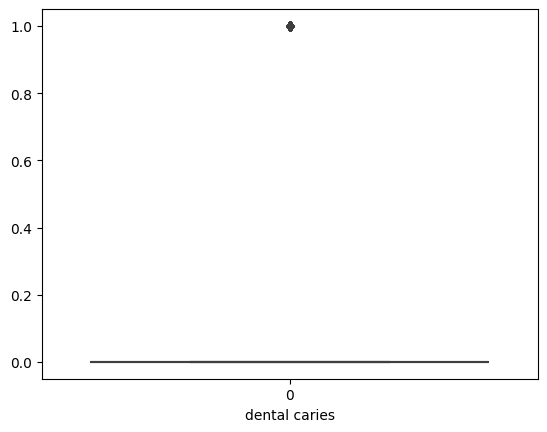

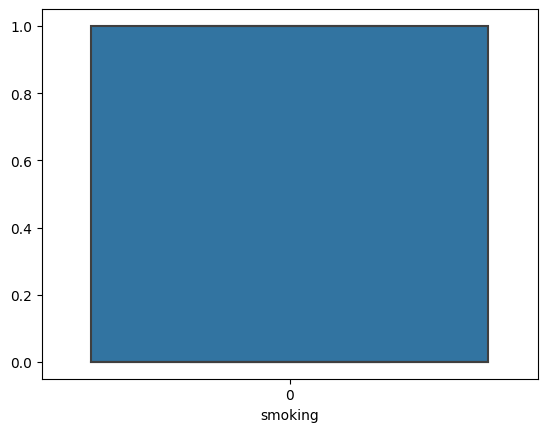

In [ ]:
for i in num_cols:
  sns.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

**Data Cleaning**

In [119]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object')
lr = LabelEncoder()

for i in cat_cols:
  df[i] = lr.fit_transform(df[i])

**Feature Selection**

In [120]:
from sklearn.ensemble import ExtraTreesClassifier

X = df.drop(columns='smoking')
y = df.smoking

etc = ExtraTreesClassifier()
etc.fit(X,y)

importance_value = etc.feature_importances_

importance_df = pd.DataFrame({'Feature':X.columns ,'Importance_value':importance_value}).sort_values(by='Importance_value',ascending=False)

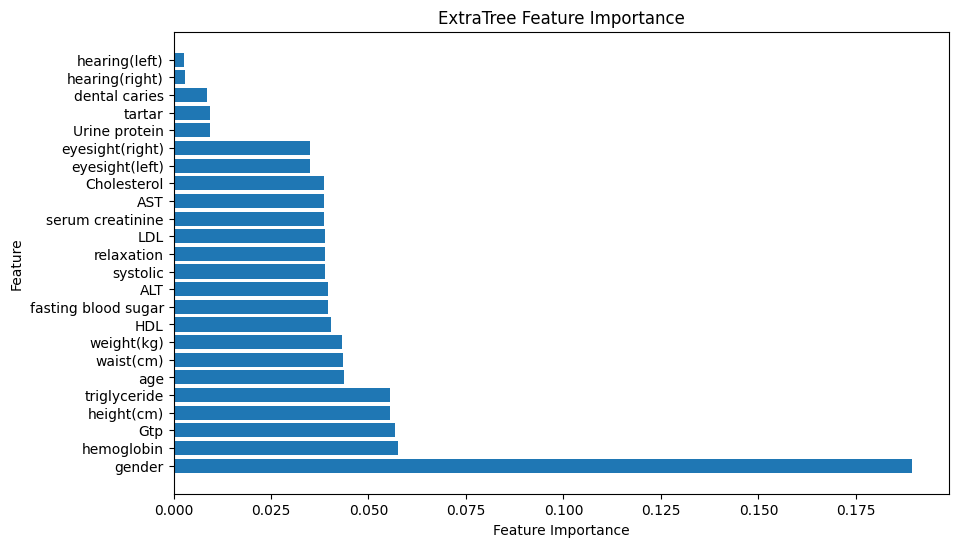

In [121]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance_value'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('ExtraTree Feature Importance')
plt.show()

**Model Selection**

In [123]:
from sklearn.model_selection import train_test_split

columns = list(importance_df.iloc[0:15,0])

X = df[columns]
y = df.smoking

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**ML Models**

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report


sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

lr = LogisticRegression()
cross = cross_validate(lr, x_train, y_train, cv=5, scoring='f1')

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n\n")
print(classification_report(y_test,y_pred))

Accuracy: 0.7400047881254489


              precision    recall  f1-score   support

           0       0.82      0.76      0.79     10557
           1       0.63      0.71      0.67      6151

    accuracy                           0.74     16708
   macro avg       0.72      0.73      0.73     16708
weighted avg       0.75      0.74      0.74     16708



In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report

dtc = DecisionTreeClassifier()
cross = cross_validate(dtc, x_train, y_train, cv=5, scoring='f1')

dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n\n")
print(classification_report(y_test,y_pred))

Accuracy: 0.7130117309073498


              precision    recall  f1-score   support

           0       0.79      0.75      0.77     10557
           1       0.60      0.65      0.63      6151

    accuracy                           0.71     16708
   macro avg       0.69      0.70      0.70     16708
weighted avg       0.72      0.71      0.72     16708



In [126]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report

etc = ExtraTreesClassifier(n_estimators=1000,random_state=42)
cross = cross_validate(etc, x_train, y_train, cv=5, scoring='f1')

etc.fit(x_train,y_train)
y_pred = etc.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n\n")
print(classification_report(y_test,y_pred))

Accuracy: 0.8218817333014125


              precision    recall  f1-score   support

           0       0.88      0.83      0.85     10557
           1       0.73      0.81      0.77      6151

    accuracy                           0.82     16708
   macro avg       0.81      0.82      0.81     16708
weighted avg       0.83      0.82      0.82     16708



In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report

rfc = RandomForestClassifier(n_estimators=1000)
cross = cross_validate(rfc, x_train, y_train, cv=5, scoring='f1')

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n\n")
print(classification_report(y_test,y_pred))

Accuracy: 0.822240842710079


              precision    recall  f1-score   support

           0       0.88      0.84      0.86     10557
           1       0.74      0.80      0.77      6151

    accuracy                           0.82     16708
   macro avg       0.81      0.82      0.81     16708
weighted avg       0.83      0.82      0.82     16708



In [128]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns='smoking')
y = df.smoking

rtc = RandomForestClassifier()
rtc.fit(X,y)

importance_value = rtc.feature_importances_

importance_df = pd.DataFrame({'Feature':X.columns ,'Importance_value':importance_value}).sort_values(by='Importance_value',ascending=False)

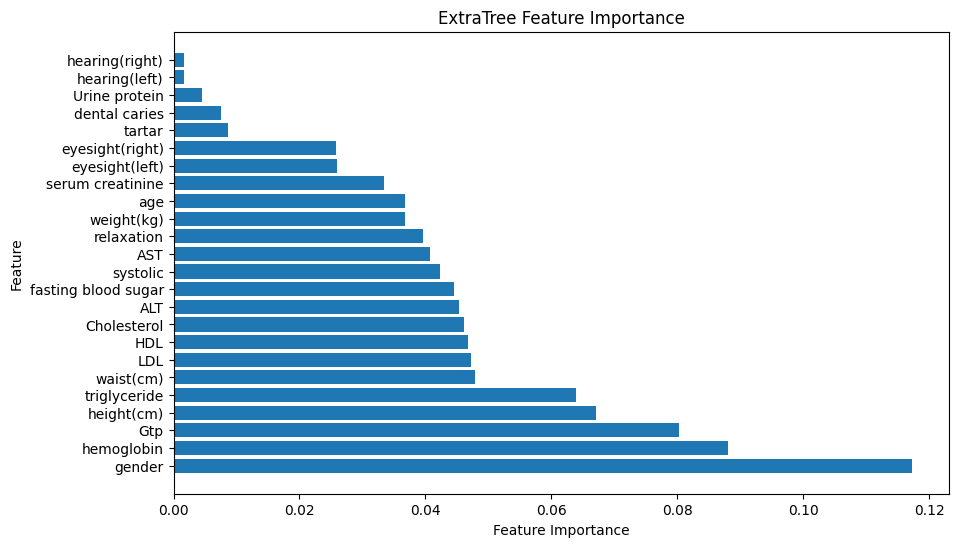

In [129]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance_value'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('ExtraTree Feature Importance')
plt.show()

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report


sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

lr = LogisticRegression()
cross = cross_validate(lr, x_train, y_train, cv=5, scoring='f1')

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n\n")
print(classification_report(y_test,y_pred))

Accuracy: 0.7400047881254489


              precision    recall  f1-score   support

           0       0.82      0.76      0.79     10557
           1       0.63      0.71      0.67      6151

    accuracy                           0.74     16708
   macro avg       0.72      0.73      0.73     16708
weighted avg       0.75      0.74      0.74     16708



In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report

dtc = DecisionTreeClassifier()
cross = cross_validate(dtc, x_train, y_train, cv=5, scoring='f1')

dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n\n")
print(classification_report(y_test,y_pred))

Accuracy: 0.71247306679435


              precision    recall  f1-score   support

           0       0.79      0.75      0.77     10557
           1       0.60      0.65      0.62      6151

    accuracy                           0.71     16708
   macro avg       0.69      0.70      0.70     16708
weighted avg       0.72      0.71      0.71     16708



In [132]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report

etc = ExtraTreesClassifier(n_estimators=1000,random_state=42)
cross = cross_validate(etc, x_train, y_train, cv=5, scoring='f1')

etc.fit(x_train,y_train)
y_pred = etc.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n\n")
print(classification_report(y_test,y_pred))

Accuracy: 0.8218817333014125


              precision    recall  f1-score   support

           0       0.88      0.83      0.85     10557
           1       0.73      0.81      0.77      6151

    accuracy                           0.82     16708
   macro avg       0.81      0.82      0.81     16708
weighted avg       0.83      0.82      0.82     16708



In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report

rfc = RandomForestClassifier(n_estimators=1000)
cross = cross_validate(rfc, x_train, y_train, cv=5, scoring='f1')

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}\n\n")
print(classification_report(y_test,y_pred))

Accuracy: 0.8214627723246349


              precision    recall  f1-score   support

           0       0.88      0.84      0.86     10557
           1       0.74      0.80      0.77      6151

    accuracy                           0.82     16708
   macro avg       0.81      0.82      0.81     16708
weighted avg       0.83      0.82      0.82     16708

